In [399]:
# Observed trend 1 : 
#  Urban has more short distance rides than the rest. 
#  Urban area has more rides but its average fee is lower. 1/3 of total rides happends in urban area.
# Observed trend 2 :
#  Urban has more drivers. B
#  Because the plot side is larger. 86% of total drivers come from urban area.
# Observed trend 3 :
#  Most of fares come from urban area but the distance of riders tend to longer.
#  Because 62% of total fares come from rural area but its average fare is higher.

In [400]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [401]:
ridefile_path = 'data/ride_data.csv'
ride_df = pd.read_csv(ridefile_path)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [402]:
cityfile_path = 'data/city_data.csv'
city_df = pd.read_csv(cityfile_path)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [661]:
pb_df = pd.merge(ride_df, city_df, how = 'left', on = 'city')
pb_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [440]:
ub_df = pb_df.loc[pb_df['type'] == 'Urban']
ub_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [428]:
sub_df = pb_df.loc[pb_df['type'] == 'Suburban']
sub_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Port James,2016-12-04 06:16:36,15.77,2259499336994,15,Suburban
1626,Port James,2016-12-04 06:16:36,15.77,2259499336994,3,Suburban
1627,New Samanthaside,2016-06-05 14:36:58,39.38,3647873452658,16,Suburban
1628,Port Alexandria,2016-07-29 09:30:09,24.86,2962960319234,27,Suburban
1629,Lake Brenda,2016-08-26 03:07:30,20.97,5231983896020,24,Suburban


In [429]:
ru_df = pb_df.loc[pb_df['type'] == 'Rural']
ru_df.head()

,city,date,fare,ride_id,driver_count,type
2282,Horneland,2016-07-19 10:07:33,12.63,8214498891817,8,Rural
2283,Kinghaven,2016-05-18 23:28:12,20.53,6432117120069,3,Rural
2284,New Johnbury,2016-04-21 08:30:25,56.60,9002881309143,6,Rural
2285,South Joseph,2016-02-17 01:41:29,57.52,7365786843443,3,Rural
2286,Kennethburgh,2016-10-19 13:13:17,24.43,2728236352387,3,Rural


In [404]:
# Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

In [646]:
# urban data
ub_total_fare_dict = ub_df.groupby('city').fare.sum().to_dict()
ub_total_ride_dict = ub_df.groupby('city').ride_id.count().to_dict()
uq_ub_df = ub_df.drop_duplicates(['city'], keep = 'last')
new_uq_ub_df = uq_ub_df[['city','driver_count','type']].sort_values('city') 

ub_driver_dict = dict(zip(new_uq_ub_df.city, new_uq_ub_df.driver_count))
ub_avg_fare_dict = {x:ub_total_fare_dict[x]/ub_total_ride_dict[x] for x in ub_total_ride_dict}

ub_city_list = list(ub_avg_fare_dict.keys())
ub_avg_fare_list = list(ub_avg_fare_dict.values())
ub_ride_list = list(ub_total_ride_dict.values())
ub_driver_list = list(ub_driver_dict.values())
ub_lar_driver_list = [x*2 for x in ub_driver_list]

In [654]:
# suburban data
sub_total_fare_dict = sub_df.groupby('city').fare.sum().to_dict()
sub_total_ride_dict = sub_df.groupby('city').ride_id.count().to_dict()
uq_sub_df = sub_df.drop_duplicates(['city'], keep = 'last')
new_uq_sub_df = uq_sub_df[['city','driver_count','type']].sort_values('city') 

sub_driver_dict = dict(zip(new_uq_sub_df.city, new_uq_sub_df.driver_count))
sub_avg_fare_dict = {x:sub_total_fare_dict[x]/sub_total_ride_dict[x] for x in sub_total_ride_dict}

sub_city_list = list(sub_avg_fare_dict.keys())
sub_avg_fare_list = list(sub_avg_fare_dict.values())
sub_ride_list = list(sub_total_ride_dict.values())
sub_driver_list = list(sub_driver_dict.values())
sub_lar_driver_list = [x*2 for x in sub_driver_list]

In [655]:
# rural data
ru_total_fare_dict = ru_df.groupby('city').fare.sum().to_dict()
ru_total_ride_dict = ru_df.groupby('city').ride_id.count().to_dict()
uq_ru_df = ru_df.drop_duplicates(['city'], keep = 'last')
new_uq_ru_df = uq_ru_df[['city','driver_count','type']].sort_values('city') 

ru_driver_dict = dict(zip(new_uq_ru_df.city, new_uq_ru_df.driver_count))
ru_avg_fare_dict = {x:ru_total_fare_dict[x]/ru_total_ride_dict[x] for x in ru_total_ride_dict}

ru_city_list = list(ru_avg_fare_dict.keys())
ru_avg_fare_list = list(ru_avg_fare_dict.values())
ru_ride_list = list(ru_total_ride_dict.values())
ru_driver_list = list(ru_driver_dict.values())
ru_lar_driver_list = [x*2 for x in ru_driver_list]

In [656]:
colors = ['lightcoral', 'lightskyblue', 'Gold']

In [657]:
urban = plt.scatter(ub_ride_list, ub_avg_fare_list, marker="o", facecolors=colors[0], edgecolors="black", s=ub_lar_driver_list, alpha=0.75)
suburban = plt.scatter(sub_ride_list, sub_avg_fare_list, marker="o", facecolors=colors[1], edgecolors="black", s=sub_lar_driver_list, alpha=0.75)
rural = plt.scatter(ru_ride_list, ru_avg_fare_list, marker="o", facecolors=colors[2], edgecolors="black", s=ru_lar_driver_list, alpha=0.75)

In [658]:
plt.ylim(15, 45)
plt.xlim(0, 40)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Rider Sharing Data (2016)')
plt.figtext(0.95, 0.6, 'Notes:', rotation='horizontal')
plt.figtext(0.95, 0.55, 'Circle size collerates with driver count per city.', rotation='horizontal')
plt.figtext(0.73, 0.83, 'City Types', rotation='horizontal')

Text(0.73,0.83,'City Types')

In [659]:
lgnd = plt.legend((urban, suburban, rural),('Urban', 'Suburban', 'Rural'),loc='upper right',bbox_to_anchor=(1, 0.95))
for handle in lgnd.legendHandles:
    handle.set_sizes([30])

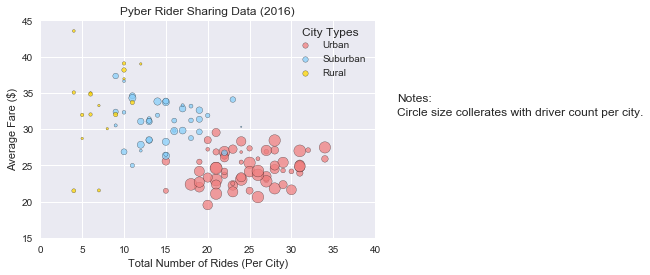

In [660]:
#sns.set()
plt.show()

In [567]:
# In addition, you will be expected to produce the following three pie charts:
# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type

In [187]:
pb_df.groupby('type').fare.sum()

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

In [188]:
t_fare_dict = pb_df.groupby('type').fare.sum().to_dict()
#t_fare_dict

In [189]:
pb_df.groupby('type').ride_id.count()

type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

In [190]:
t_ride_dict = pb_df.groupby('type').ride_id.count().to_dict()
#t_ride_dict

In [191]:
pb_df.groupby('type').driver_count.sum()

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

In [192]:
t_driver_dict = pb_df.groupby('type').driver_count.sum().to_dict()
#t_driver_dict

In [193]:
t_type_list = list(t_fare_dict.keys())
t_fare_list = list(t_fare_dict.values())
t_ride_list = list(t_ride_dict.values())
t_driver_list = list(t_driver_dict.values())

In [213]:
colors = ['Gold', 'lightskyblue', 'lightcoral']
explode = (0.1,0.1,0)

In [214]:
plt.pie(t_fare_list, explode=explode, labels=t_type_list, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0xe0bfcf0>,
 [Text(-1.058,0.566256,'Rural'),
  Text(-0.915343,-0.775981,'Suburban'),
  Text(0.967193,0.523963,'Urban')],
 [Text(-0.617164,0.330316,'6.6%'),
  Text(-0.53395,-0.452656,'31.4%'),
  Text(0.52756,0.285798,'62.0%')])

In [215]:
#plt.axis("equal")

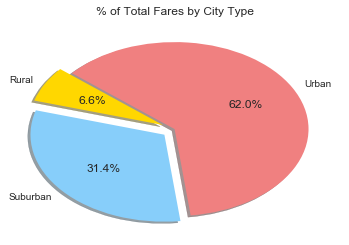

In [216]:
plt.title('% of Total Fares by City Type')
plt.show()

In [217]:
plt.pie(t_ride_list, explode=explode, labels=t_type_list, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0xeb096d0>,
 [Text(-1.03233,0.611792,'Rural'),
  Text(-1.06123,-0.560167,'Suburban'),
  Text(1.04328,0.348661,'Urban')],
 [Text(-0.602194,0.356878,'5.2%'),
  Text(-0.619052,-0.326764,'27.3%'),
  Text(0.569062,0.190179,'67.5%')])

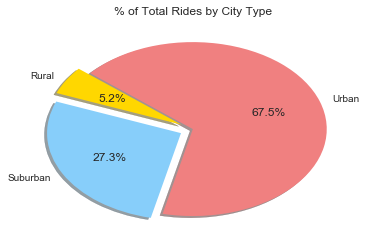

In [218]:
plt.title('% of Total Rides by City Type')
plt.show()

In [219]:
plt.pie(t_driver_list, explode=explode, labels=t_type_list, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0xeb3e150>,
 [Text(-0.942326,0.742982,'Rural'),
  Text(-1.16856,0.272866,'Suburban'),
  Text(1.06307,-0.282645,'Urban')],
 [Text(-0.54969,0.433406,'1.0%'),
  Text(-0.681663,0.159172,'13.0%'),
  Text(0.579855,-0.15417,'86.0%')])

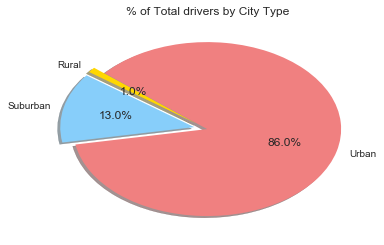

In [220]:
plt.title('% of Total drivers by City Type')
plt.show()